                                                 18S01ACS011

In [1]:
import nltk

Code below opens the csv file with the different comments

In [2]:
import csv

In [44]:
file = open('C:/Users/user/Desktop/comments.csv',encoding = "utf8")

In [45]:
reader = csv.reader(file)

In [46]:
Nduati_comments = []

In [47]:
for line in reader:
    Nduati_comments.append(line)

In [1]:
#print (Nduati_comments)

Below code conversts the arrar to a string for text filtering

In [49]:
filt_comments = ' '.join([str(elem) for elem in Nduati_comments])

In [2]:
#print (filt_comments)

Below code removes URL's

In [25]:
import re

In [51]:
Nduati_comments1 = re.sub(r'http\S+', '', filt_comments, flags=re.MULTILINE)

In [53]:
print (Nduati_comments1)

['\ufeffURL', 'comments'] [' 'The delay'] ['', 'The delay, it’s been 19 days yet no delivery, this has to be one of the worst experiences of mine. They tell me my package will be here in 2 days, however I leave for dubai in a day. With this inconvenience they don’t do anything about it, I ask nicely to ship it to my house, their employee Jacob doesn’t want.'] ['', 'Date of experience:\xa0February 22, 2023'] ['', ''] ['', 'UsefulShare'] ['', ''] ['', 'Adeyemi Olufemi'] ['', '1\xa0review'] ['', 'AU'] ['', ''] ['', ''] ['', '13-Jan-23'] ['', 'Poor delivery'] ['', 'Every delivery with this stupid company is a war, you will have to run after them, deal with those rude and unprofessional help desk guys. I wish I could give a negative star'] ['', 'Date of experience:\xa0January 12, 2023'] ['', ''] ['', 'Useful2Share'] ['', 'SR'] ['', 'Shila Rida'] ['', '1\xa0review'] ['', 'KE'] ['', ''] ['', ''] ['', '26-Jan-23'] ['', 'I bought my item on Monday and received…'] ['', 'I bought my item on Monda

code below removes special characters from the previous string with the help of a regEx

In [157]:
Nduati_comments2 = re.sub("\n|@|#|\s|\\|.|,|xa0" , "\t " , Nduati_comments1)

In [158]:
print (Nduati_comments2)

['\ufeffURL'	 	 'comments']	 ['	 'The	 delay']	 [''	 	 'The	 delay	 	 it’s	 been	 19	 days	 yet	 no	 delivery	 	 this	 has	 to	 be	 one	 of	 the	 worst	 experiences	 of	 mine.	 They	 tell	 me	 my	 package	 will	 be	 here	 in	 2	 days	 	 however	 I	 leave	 for	 dubai	 in	 a	 day.	 With	 this	 inconvenience	 they	 don’t	 do	 anything	 about	 it	 	 I	 ask	 nicely	 to	 ship	 it	 to	 my	 house	 	 their	 employee	 Jacob	 doesn’t	 want.']	 [''	 	 'Date	 of	 experience:\	 February	 22	 	 2023']	 [''	 	 '']	 [''	 	 'UsefulShare']	 [''	 	 '']	 [''	 	 'Adeyemi	 Olufemi']	 [''	 	 '1\	 review']	 [''	 	 'AU']	 [''	 	 '']	 [''	 	 '']	 [''	 	 '13-Jan-23']	 [''	 	 'Poor	 delivery']	 [''	 	 'Every	 delivery	 with	 this	 stupid	 company	 is	 a	 war	 	 you	 will	 have	 to	 run	 after	 them	 	 deal	 with	 those	 rude	 and	 unprofessional	 help	 desk	 guys.	 I	 wish	 I	 could	 give	 a	 negative	 star']	 [''	 	 'Date	 of	 experience:\	 January	 12	 	 2023']	 [''	 	 '']	 [''	 	 'Useful2Share']	 [''	 	 'SR']	 

Next we convert this text to lowercase.

In [159]:
Nduati_comments3 = Nduati_comments2.lower()

In [1]:
#print (Nduati_comments3)

In the next section I will perform word tokenization on the text

In [161]:
from nltk.tokenize import word_tokenize

In [162]:
Nduati_comments4 = word_tokenize(Nduati_comments3)

In [3]:
#print (Nduati_comments4)

The next section deals with stop words removal

In [164]:
from nltk.corpus import stopwords

In [165]:
sw = set (stopwords.words('english'))

In [166]:
Nduati_comments5 =[]

In [167]:
for w in Nduati_comments4:
    if w not in sw:
        Nduati_comments5.append(w)

In [2]:
#print (Nduati_comments5)

Next I will stem the text data above using the Porter Stemmer

In [169]:
from nltk.stem import PorterStemmer

In [170]:
ps = PorterStemmer()

In [171]:
Nduati_comments6 = []

In [172]:
for w in Nduati_comments5:
    Nduati_comments6.append( ps.stem(w))

In [3]:
#print (Nduati_comments6)

Next is lemmatization using the Word Net Lemmatizer

In [174]:
from nltk.stem import WordNetLemmatizer

In [175]:
wnl = WordNetLemmatizer()

In [176]:
Nduati_comments7 = []

In [177]:
for w in Nduati_comments5:
    Nduati_comments7.append (wnl.lemmatize(w))
  

In [4]:
#print (Nduati_comments7)

Nect I will make a word cloud based on the filtered data

In [179]:
import pandas as pd

In [180]:
import matplotlib.pyplot as plt

In [181]:
from wordcloud import WordCloud

In [182]:
# since we were working with arrays we need to convert to string for the word cloud
Nduati_comments8 = ' '.join([str(elem) for elem in Nduati_comments7])

In [201]:
#Below code generates the word cloud with the desired characteristics.
mywordcloud = WordCloud(
width = 500,
height = 500,

background_color = 'blue',
    colormap = "Pastel1",
    random_state=10,
    collocations=False,

).generate(Nduati_comments8)

In [214]:
def plot_cloud(mywordcloud):
    #sets the figure size
    plt.figure(figsize=(10,20))
    #Displays the image
    plt.imshow(mywordcloud)
    #Declares the 'No Axis Details'
    plt.axis("off")

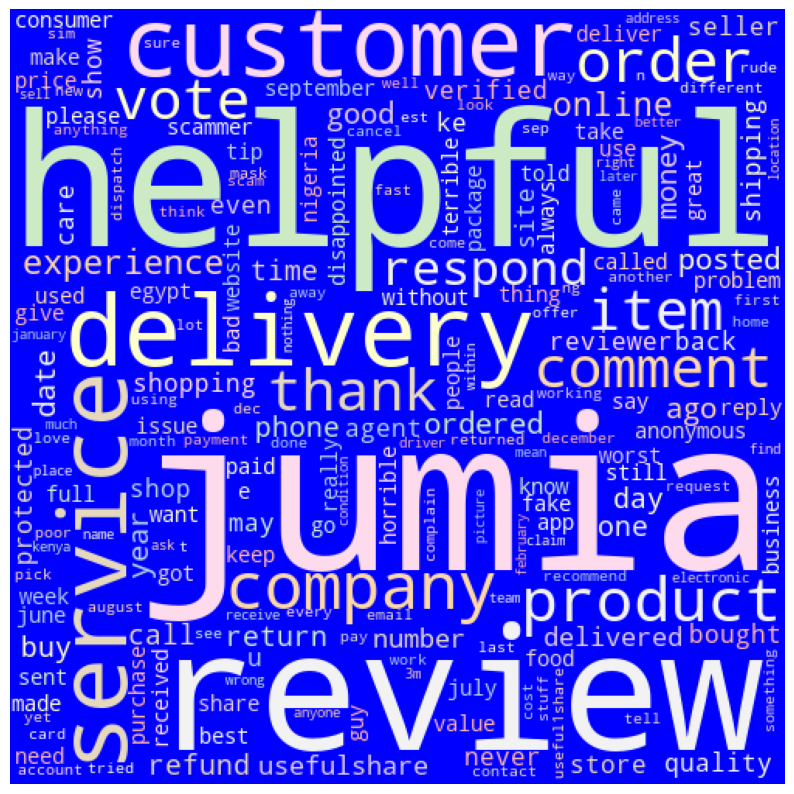

In [215]:
plot_cloud(mywordcloud)

Finally I will save the filterwd data in a new csv file

In [241]:
import csv
with open("C:/Users/user/Desktop/filteredcomments.csv", 'w', encoding = "utf8") as Fl:
    headernames = ["Company","Comments"]
    writer = csv.DictWriter(Fl,headernames)
    writer.writeheader()
    writer.writerow({'Company':'Jumia'})
    writer.writerow({'Comments':Nduati_comments8})
    
    